In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random
from math import pi, sqrt
from scipy.special import erf 

def success_prob_calc(Δ):
    return (erf( (pi**0.5)/(2*Δ) )- erf(-(pi**0.5)/(2*Δ) )  )/2
'''
Couple of choices could be:
For homodyne measurement efficiency
1- No loss (\eta=1)
2- \eta = 0.95
3- \eta = 0.85
And for \sigma_c, two choices
\sigma_c=\sigma_gkp or 0
'''

'\nCouple of choices could be:\nFor homodyne measurement efficiency\n1- No loss (\\eta=1)\n2- \\eta = 0.95\n3- \\eta = 0.85\nAnd for \\sigma_c, two choices\n\\sigma_c=\\sigma_gkp or 0\n'

## hadamard
$p_y = p_z$

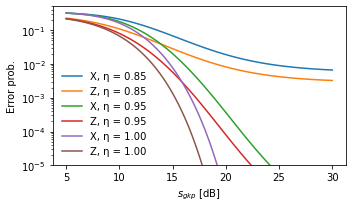

In [33]:
σ2_list = np.logspace(-3,-0.5,100)/2
η_list = [0.85,1]# np.array([0.75,0.85,0.95,1.0])
# η_list = np.array([0.75,0.85,0.95,1.0])

plt.figure(1,figsize=(5,3))

for i_n, η in enumerate(η_list):
    σm2 = (1-η)/(2*η)
    prob_X = np.zeros(len(σ2_list))
    prob_Z = np.zeros(len(σ2_list))

    for i_s, σgkp2 in enumerate(σ2_list):
        σc2 = σgkp2 # cz gate error
        σn = (2**0.5) * ( 3*σgkp2+ 11/3*σc2 + σm2)**0.5
        Xerr = 1-success_prob_calc(σn)
        σn = (2**0.5) * ( (3*σgkp2+ 11/3*σc2+ σgkp2+ 2*σc2)/2 + σm2)**0.5
        Yerr = 1-success_prob_calc(σn)
        prob_X[i_s] = Xerr*(1-Yerr)**3+ Yerr*(1-Xerr)*(1-Yerr)**2+ Yerr**2*(1-Xerr)*(1-Yerr)+ Xerr**3
        prob_Z[i_s] = Yerr*(1-Yerr)**2+ Yerr**2*(1-Yerr)
    plt.plot(-10*np.log10(2*σ2_list),prob_X,"-", color="C%d" % (2*i_n),label="X, η = %.2f" % (η))
    plt.plot(-10*np.log10(2*σ2_list),prob_Z,"-", color="C%d" % (2*i_n+1),label="Z, η = %.2f" % (η))

plt.yscale("log")
# plt.xscale("log")
plt.ylim(1e-5,5e-1)
# plt.xlim(4,31)
plt.xlabel(r"$s_{gkp}$ [dB]")
plt.ylabel("Error prob.")
# plt.grid()
plt.legend(frameon=False,markerscale=2)
plt.tight_layout()
# plt.grid()
# plt.savefig("figs/hadamard_error.pdf")
plt.show()

## S gate
$p_x = p_y$

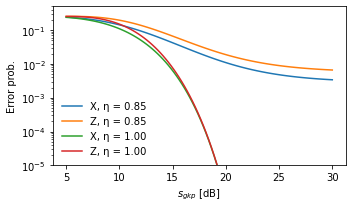

In [3]:
σ2_list = np.logspace(-3,-0.5,100)/2
η_list = [0.85,1]# np.array([0.75,0.85,0.95,1.0])
# η_list = np.array([0.75,0.85,0.95,1.0])

plt.figure(1,figsize=(5,3))

for i_n, η in enumerate(η_list):
    σm2 = (1-η)/(2*η)
    prob_X = np.zeros(len(σ2_list))
    prob_Z = np.zeros(len(σ2_list))

    for i_s, σgkp2 in enumerate(σ2_list):
        σc2 = σgkp2 # cz gate error
        σn = (2**0.5) * ( 3*σgkp2+ 11/3*σc2 + σm2)**0.5
        Xerr = 1-success_prob_calc(σn)
        σn = (2**0.5) * ( (3*σgkp2+ 11/3*σc2+ σgkp2+ 2*σc2)/2 + σm2)**0.5
        Yerr = 1-success_prob_calc(σn)
        prob_X[i_s] = Xerr*(1-Xerr)
        # prob_Z[i_s] = Xerr**2 *(Xerr*Yerr+(1-Xerr)*(1-Yerr))+ (1-Xerr)**2 *(Xerr*(1-Yerr)+Yerr*(1-Xerr))
        prob_Z[i_s] = Xerr+ Yerr -4*Xerr*Yerr-Xerr**2 *(1-4*Yerr)

    plt.plot(-10*np.log10(2*σ2_list),prob_X,"-", color="C%d" % (2*i_n),label="X, η = %.2f" % (η))
    plt.plot(-10*np.log10(2*σ2_list),prob_Z,"-", color="C%d" % (2*i_n+1),label="Z, η = %.2f" % (η))

plt.yscale("log")
# plt.xscale("log")
plt.ylim(1e-5,5e-1)
# plt.xlim(4,31)
plt.xlabel(r"$s_{gkp}$ [dB]")
plt.ylabel("Error prob.")
# plt.grid()
plt.legend(frameon=False,markerscale=2)
plt.tight_layout()
# plt.grid()
# plt.savefig("figs/sgate_error.pdf")
plt.show()

## U3

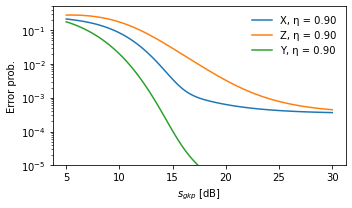

In [90]:
σ2_list = np.logspace(-3,-0.5,100)/2
η_list = [.9]# np.array([0.75,0.85,0.95,1.0])
# η_list = np.array([0.75,0.85,0.95,1.0])

plt.figure(1,figsize=(5,3))
k=1
for i_n, η in enumerate(η_list):
    σm2 = (1-η)/(2*η)
    prob_X = np.zeros(len(σ2_list))
    prob_Z = np.zeros(len(σ2_list))
    prob_Y = np.zeros(len(σ2_list))
    for i_s, σgkp2 in enumerate(σ2_list):
        σc2 = σgkp2 # cz gate error
        σin = (2**0.5) * (k*(2*σgkp2 + 17/6*σc2))**0.5
        σout = (2**0.5) * (σgkp2 + σm2)**0.5
        
        σn = (2**0.5) * (3*σgkp2+ 11/3*σc2 + σm2)**0.5
        Xerr = 1-success_prob_calc(σn)
        σn = (2**0.5) * ( (3*σgkp2+ 11/3*σc2+ σgkp2+ 2*σc2)/2 + σm2)**0.5
        Yerr = 1-success_prob_calc(σn)
        #check the factor
        Nerr = 2*(1-success_prob_calc(σin))/3 + (1-success_prob_calc(σout))
        
        prob_X[i_s] = 2*Nerr*(1-Nerr)**2*(1-Xerr)+2*Nerr**2*(1-Nerr)*(Xerr)
        prob_Z[i_s] = Nerr*(1-Nerr)**2*(1-Xerr)+ Xerr*(1-Nerr)**2*(1-Nerr)+(1-Xerr)*Nerr**3+Xerr*(1-Nerr)*Nerr**2
        prob_Y[i_s] = 2*Nerr*Xerr*(1-Nerr)**2 + 2*Nerr*Nerr*(1-Xerr)* (1-Nerr)
    plt.plot(-10*np.log10(2*σ2_list),prob_X,"-", color="C%d" % (3*i_n),label="X, η = %.2f" % (η))
    plt.plot(-10*np.log10(2*σ2_list),prob_Z,"-", color="C%d" % (3*i_n+1),label="Z, η = %.2f" % (η))
    plt.plot(-10*np.log10(2*σ2_list),prob_Y,"-", color="C%d" % (3*i_n+2),label="Y, η = %.2f" % (η))

plt.yscale("log")
# plt.xscale("log")
plt.ylim(1e-5,5e-1)
# plt.xlim(4,31)
plt.xlabel(r"$s_{gkp}$ [dB]")
plt.ylabel("Error prob.")
# plt.grid()
plt.legend(frameon=False,markerscale=2)
plt.tight_layout()
# plt.grid()
plt.savefig(f"figs/u3_gate_error,k={k} .pdf")
plt.show()

In [55]:
-10*np.log10(2*σ2_list)

array([30.        , 29.74747475, 29.49494949, 29.24242424, 28.98989899,
       28.73737374, 28.48484848, 28.23232323, 27.97979798, 27.72727273,
       27.47474747, 27.22222222, 26.96969697, 26.71717172, 26.46464646,
       26.21212121, 25.95959596, 25.70707071, 25.45454545, 25.2020202 ,
       24.94949495, 24.6969697 , 24.44444444, 24.19191919, 23.93939394,
       23.68686869, 23.43434343, 23.18181818, 22.92929293, 22.67676768,
       22.42424242, 22.17171717, 21.91919192, 21.66666667, 21.41414141,
       21.16161616, 20.90909091, 20.65656566, 20.4040404 , 20.15151515,
       19.8989899 , 19.64646465, 19.39393939, 19.14141414, 18.88888889,
       18.63636364, 18.38383838, 18.13131313, 17.87878788, 17.62626263,
       17.37373737, 17.12121212, 16.86868687, 16.61616162, 16.36363636,
       16.11111111, 15.85858586, 15.60606061, 15.35353535, 15.1010101 ,
       14.84848485, 14.5959596 , 14.34343434, 14.09090909, 13.83838384,
       13.58585859, 13.33333333, 13.08080808, 12.82828283, 12.57

In [56]:
dB = 30
σ = 10**(-1/10*dB)/2

0.0005

In [154]:
def h_error_gkp(σc2, σgkp2, σm2):
    prob_X = 0
    prob_Z = 0

    σc2 = σgkp2 # cz gate error
    σn = (2**0.5) * ( 3*σgkp2+ 11/3*σc2 + σm2)**0.5
    Xerr = 1-success_prob_calc(σn)
    σn = (2**0.5) * ( (3*σgkp2+ 11/3*σc2+ σgkp2+ 2*σc2)/2 + σm2)**0.5
    Yerr = 1-success_prob_calc(σn)
    prob_X = Xerr*(1-Yerr)**3+ Yerr*(1-Xerr)*(1-Yerr)**2+ Yerr**2*(1-Xerr)*(1-Yerr)+ Xerr*Yerr*(1-Xerr)**2
    prob_Y = Yerr*(1-Xerr)*(1-Yerr)**2 +Yerr**2*Xerr*(1-Yerr)+Yerr**2*(1-Xerr)*(1-Yerr)+Yerr*Xerr*(1-Xerr)*(1-Yerr)
    prob_Z = Yerr*(1-Xerr)*(1-Yerr)**2 + Yerr**2*Xerr*(1-Yerr)+Yerr**2*(1-Xerr)*(1-Yerr)+Yerr*Xerr*(1-Xerr)*(1-Yerr)
    
    total_error = prob_X + prob_Y + prob_Z
    return [('I',1 - total_error), ('X',prob_X),('Y',prob_Y),('Z',prob_Z)]


## cnot

In [5]:
def Hilbertspace_Zr(N,r):
    states=np.zeros((r**N,N),dtype=int)
    if N>0:
        for i_1 in range(r**N):
            num_str=np.base_repr(i_1,base=r)[::-1]
            for i_2 in range(len(num_str)):
                states[i_1,i_2]=int(num_str[i_2])
    else:
        states=[[0]]
        
    return states


def success_prob_calc(Δ):
    return (erf( (pi**0.5)/(2*Δ) )- erf(-(pi**0.5)/(2*Δ) )  )/2

def cnot_error_calc(σ2_list,σm2):
    Nq = 13
    vec = Hilbertspace_Zr(Nq,2)

    # qubits measured in X or Y basis
    X_list = [0,7,8,9,11,12]
    Y_list = [1,2,3,4,5,6,10]
    Nx = len(X_list)+1
    Ny = len(Y_list)+1

    err_vec = np.zeros((16,Ny*Nx),dtype=int)
    for i in range(2**Nq):
        s_flip=vec[i,:]

        sz_c = np.sum(vec[i,[0,2,3,4,6,7,9]])
        sx_c = np.sum(vec[i,[1,2,4,5]])
        sz_t = np.sum(vec[i,[7,9,11]])
        sx_t = np.sum(vec[i,[1,2,6,8,10,12]])
        px_exp = np.sum(vec[i,X_list])
        py_exp = np.sum(vec[i,Y_list])

        i_e = np.array([sz_c%2,sx_c%2,sz_t%2,sx_t%2])@ (2**np.arange(4))
        err_vec[i_e,py_exp*Nx + px_exp] += 1

    err_prob = np.zeros((16,len(σ2_list)))

    for i_s, σgkp2 in enumerate(σ2_list):
        σc2 = σgkp2 # cz gate error
        σn = (2**0.5) * ( 3*σgkp2+ 11/3*σc2 + σm2)**0.5
        Xerr = 1-success_prob_calc(σn)
        px_vec = Xerr**np.arange(Nx)*(1-Xerr)**np.arange(Nx-1,-1,-1)
        σn = (2**0.5) * ( (3*σgkp2+ 11/3*σc2+ σgkp2+ 2*σc2)/2 + σm2)**0.5
        Yerr = 1-success_prob_calc(σn)
        py_vec = Yerr**np.arange(Ny)*(1-Yerr)**np.arange(Ny-1,-1,-1)
        p_vec = np.kron(py_vec,px_vec)
        err_prob[:,i_s] = err_vec @ p_vec    
    return err_prob

In [6]:
σ2_list = np.logspace(-3,-0.5,100)/2
η_list = [0.8,1]# homodyne measurement efficiency
# η_list = np.array([0.75,0.85,0.95,1.0])

err_list={0: 'II', 1: 'ZI', 2: 'XI', 3: 'YI', 4: 'IZ', 5: 'ZZ', 6: 'XZ',\
          7: 'YZ', 8: 'IX', 9: 'ZX', 10: 'XX', 11: 'YX', 12: 'IY',\
          13: 'ZY', 14: 'XY', 15: 'YY'}

err_prob = np.zeros((len(η_list),16,len(σ2_list)))
for i_n, η in enumerate(η_list):
    σm2 = (1-η)/(2*η)
    err_prob[i_n,:,:] = cnot_error_calc(σ2_list,σm2) # note σc2 is defined inside this function


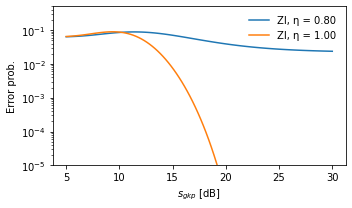

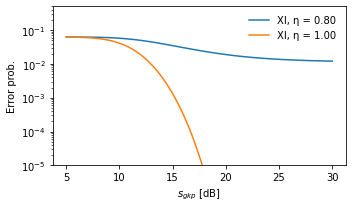

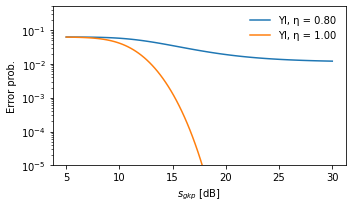

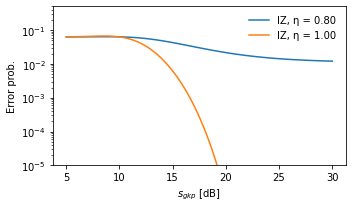

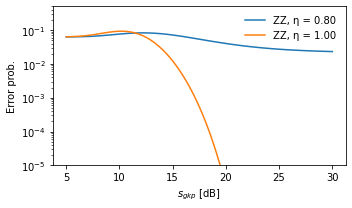

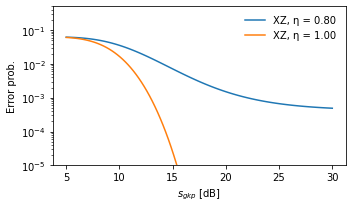

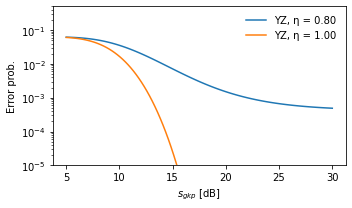

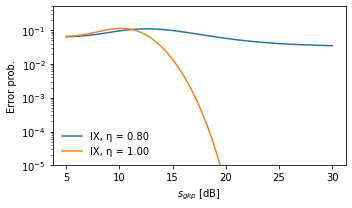

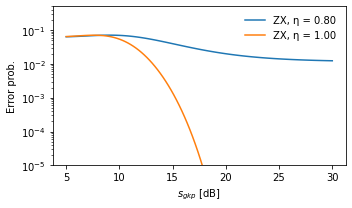

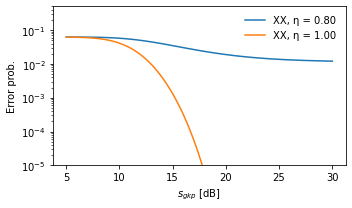

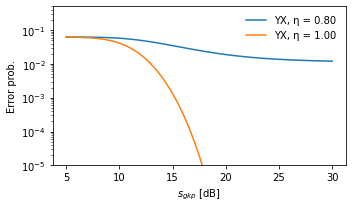

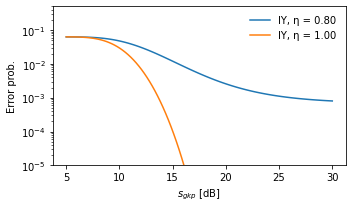

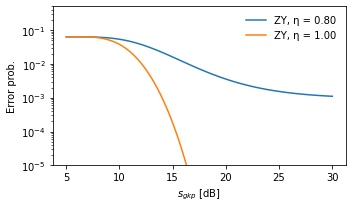

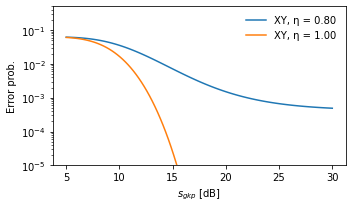

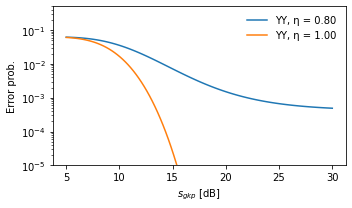

In [7]:
# plt.figure(1,figsize=(5,3))
# [Z_c,X_c,Z_t,X_t] # numbering scheme    
for i_xx in np.arange(1,16):
# for i_xx in [8,6]:
    plt.figure(i_xx,figsize=(5,3))
    for i_n, η in enumerate(η_list):
        plt.plot(-10*np.log10(2*σ2_list),err_prob[i_n,i_xx,:],"-", label=err_list[i_xx]+ ", η = %0.2f" % η)#, color="C%d" % (i_xx)

    plt.yscale("log")
    # plt.xscale("log")
    if i_xx>0:
        plt.ylim(1e-5,5e-1)
    else:
        plt.ylim(5e-2,2)
    # plt.xlim(4,31)
    plt.xlabel(r"$s_{gkp}$ [dB]")
    plt.ylabel("Error prob.")
    # plt.grid()
    plt.legend(frameon=False,markerscale=2)
    plt.tight_layout()
    # plt.grid()
    # plt.savefig("figs/cnot_err_%s.pdf" % err_list[i_xx])
    plt.show()

In [197]:
def success_prob_calc(Δ):
    return (erf( (pi**0.5)/(2*Δ) )- erf(-(pi**0.5)/(2*Δ) )  )/2

def u3_error_gkp(σc2, σgkp2, σm2,k):

    σin = (2**0.5) * (k*(2*σgkp2 + 17/6*σc2))**0.5
    σout = (2**0.5) * (σgkp2 + σm2)**0.5
    
    σn = (2**0.5) * (3*σgkp2+ 11/3*σc2 + σm2)**0.5
    Xerr = 1-success_prob_calc(σn)
    σn = (2**0.5) * ( (3*σgkp2+ 11/3*σc2+ σgkp2+ 2*σc2)/2 + σm2)**0.5
    Yerr = 1-success_prob_calc(σn)
    #check the factor
    Nerr = 2*(1-success_prob_calc(σin))/3 + (1-success_prob_calc(σout))
    
    prob_X = 2*Nerr*(1-Nerr)**2*(1-Xerr)+2*Nerr**2*(1-Nerr)*(Xerr)
    prob_Z = Nerr*(1-Nerr)**2*(1-Xerr)+ Xerr*(1-Nerr)**2*(1-Nerr)+(1-Xerr)*Nerr**3+Xerr*(1-Nerr)*Nerr**2
    prob_Y = 2*Nerr*Xerr*(1-Nerr)**2 + 2*Nerr*Nerr*(1-Xerr)* (1-Nerr)
    total_error = prob_X + prob_Z + prob_Y
    
    return [('I',1 - total_error), ('X',prob_X),('Y',prob_Y),('Z',prob_Z)]


def cnot_error_gkp(σc2, σgkp2, σm2):
    #Calculate the raw error rates
    Nq = 13
    vec = Hilbertspace_Zr(Nq,2)

    # qubits measured in X or Y basis
    X_list = [0,7,8,9,11,12]
    Y_list = [1,2,3,4,5,6,10]
    Nx = len(X_list)+1
    Ny = len(Y_list)+1

    err_vec = np.zeros((16,Ny*Nx),dtype=int)
    for i in range(2**Nq):
        s_flip=vec[i,:]

        sz_c = np.sum(vec[i,[0,2,3,4,6,7,9]])
        sx_c = np.sum(vec[i,[1,2,4,5]])
        sz_t = np.sum(vec[i,[7,9,11]])
        sx_t = np.sum(vec[i,[1,2,6,8,10,12]])
        px_exp = np.sum(vec[i,X_list])
        py_exp = np.sum(vec[i,Y_list])

        i_e = np.array([sz_c%2,sx_c%2,sz_t%2,sx_t%2])@ (2**np.arange(4))
        err_vec[i_e,py_exp*Nx + px_exp] += 1

    err_prob = np.zeros(16)

    σn = (2**0.5) * ( 3*σgkp2+ 11/3*σc2 + σm2)**0.5
    Xerr = 1-success_prob_calc(σn)
    px_vec = Xerr**np.arange(Nx)*(1-Xerr)**np.arange(Nx-1,-1,-1)
    σn = (2**0.5) * ( (3*σgkp2+ 11/3*σc2+ σgkp2+ 2*σc2)/2 + σm2)**0.5
    Yerr = 1-success_prob_calc(σn)
    py_vec = Yerr**np.arange(Ny)*(1-Yerr)**np.arange(Ny-1,-1,-1)
    p_vec = np.kron(py_vec,px_vec)
    err_prob = err_vec @ p_vec    
    
    err_list={0: 'II', 1: 'ZI', 2: 'XI', 3: 'YI', 4: 'IZ', 5: 'ZZ', 6: 'XZ',\
          7: 'YZ', 8: 'IX', 9: 'ZX', 10: 'XX', 11: 'YX', 12: 'IY',\
          13: 'ZY', 14: 'XY', 15: 'YY'}
    err_model = []
    for i in range (16):
        err_model.append((err_list[i],err_prob[i]))
    
    return err_model


def error_model_gkp(σc2, σgkp2, σm2, k=1, gate_type = 'U3'): 
    #a wrapper function that, given a Gaussian noise distribution, returns a noise channel
    '''
    σgkp2: GKP error
    σc2: CZ error 
    σm2: measurement error
    '''

    if gate_type == 'U3':
        error_model = u3_error_gkp(σc2, σgkp2, σm2, k)
        
    elif gate_type == 'H':
        error_model = h_error_gkp(σc2, σgkp2, σm2)
        
    elif gate_type == 'CNOT':
        error_model = cnot_error_gkp(σc2, σgkp2, σm2)
    else:
        raise NotImplementedError('Shit, the requested gate type is not implemented')
    return error_model
    

In [185]:
from MBQC_basic_functions import*
dB = 12
σ2 = 10**(-1/10*dB)/2
k = 5
η = 1
σm2 = (1-η)/(2*η)
σc2 = 0
σgkp2 = σ2

cnot = np.array([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]])+0j
h = np.array([[1,1],[1,-1]])/np.sqrt(2)
def pauli(s):
    s0 = np.matrix([[1.,0.],[0.,1.]])
    s1 = np.matrix([[0.,1.],[1.,0.]])
    s2 = np.matrix([[0.,-1.j],[1.j,0.]])
    s3 = np.matrix([[1.,0.],[0.,-1.]])
    if s == 'I':
        return s0 
    elif s =='X':
        return s1
    elif s == 'Y':
        return s2
    elif s == 'Z':
        return s3
    
def pauli_str_to_mat(string):
    U = pauli(string[0])
    for k in range(1,len(string)):
        U =np.kron(U, pauli(string[k]))
    return U

def error_channel_cnot(U_in, error_model):
    n = len(U_in)
    U_out = np.zeros([n,n])+0.j
    for i in range (n**2):
        U_out += error_model[i][1]*pauli_str_to_mat(error_model[i][0])@cnot@U_in@cnot@pauli_str_to_mat(error_model[i][0])
    return U_out

def error_channel_h(U_in, error_model):
    n = len(U_in)
    U_out = np.zeros([n,n])+0.j
    for i in range (n**2):
        U_out += error_model[i][1]*pauli_str_to_mat(error_model[i][0])@h@U_in@h@pauli_str_to_mat(error_model[i][0])
    return U_out

def fidelity_CNOT(error_model): # input a error model; out put the average fid. based on https://arxiv.org/pdf/quant-ph/0205035.pdf   
    err_list= {0: 'II', 1: 'ZI', 2: 'XI', 3: 'YI', 4: 'IZ', 5: 'ZZ', 6: 'XZ',\
          7: 'YZ', 8: 'IX', 9: 'ZX', 10: 'XX', 11: 'YX', 12: 'IY',\
          13: 'ZY', 14: 'XY', 15: 'YY'}
    fid = 0.2
    for i in range (16):
        U_in = pauli_str_to_mat(err_list[i])
        U_out = error_channel_cnot(U_in, error_model)
        fid += np.trace(cnot@np.conj(U_in.T)@cnot@U_out)/80
    return fid

def fidelity_H(error_model): # input a error model; out put the average fid. based on https://arxiv.org/pdf/quant-ph/0205035.pdf   
    err_list= {0: 'I',1:'X',2:'Y',3:'Z',}
    fid = 1/3
    for i in range (4):
        U_in = pauli_str_to_mat(err_list[i])
        U_out = error_channel_h(U_in, error_model)
        fid += np.trace(h@np.conj(U_in.T)@h@U_out)/12
    return fid

In [188]:
err = error_model_gkp(1, 1, 1, k=1, gate_type = 'H')
fidelity_H(err)

H


(0.6663427718606851+0j)

In [311]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
mpl.rcParams.update(mpl.rcParamsDefault)
import phd_plot_style
pub_fig_style = phd_plot_style.phd_revtex_plots()
# magic commands
%matplotlib inline
%config InlineBackend.print_figure_kwargs
%config InlineBackend.print_figure_kwargs={'bbox_inches':None, 'dpi': 200}
# Colors
cBlues = sns.color_palette("Blues_r", n_colors=7)#[::3]
cOranges = sns.color_palette("Oranges_r", n_colors=7)#[::3]#[1:-1]
cGreens = sns.color_palette("Greens_r", n_colors=7)#[::3]#[1:-1]
cPurples = sns.color_palette("Purples_r", n_colors=8)#[::3]#[1:-1]
cGreys = sns.color_palette("PuRd_r", n_colors=7)#[::3]#[1:-1]
color_zip = [cPurples, cBlues, cOranges, cGreens, cGreys]
# define dimensions
fig_width  = pub_fig_style.revtex_sizes_active["page.columnwidth"] * pub_fig_style.tex_pt_to_inch
fig_height = pub_fig_style._get_revtex_rc()["figure.figsize"][1]

plt.rcParams.update({
  "text.usetex": True,
  "font.family": "Roman",
    "font.size": 18,
'axes.titlesize': 18,
'axes.labelsize':  18})


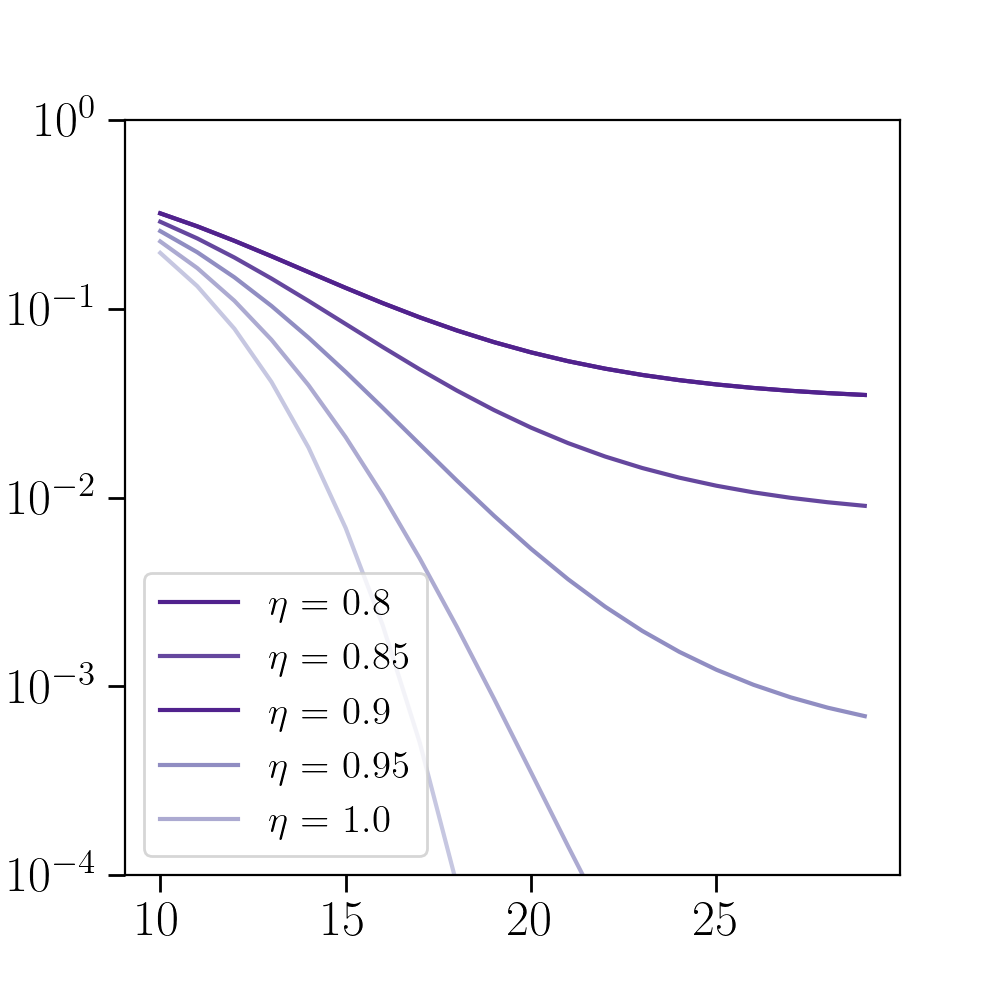

In [313]:
error_model = error_model_gkp(σc2, σgkp2, σm2, k=1, gate_type = 'H')
fidelity_H(error_model)
fid_total = []
plt.figure(figsize=(5,5))
dBs = np.arange(10,30,1)
η_list = [0.8,0.85,0.8,.9,.95,1]# homodyne measurement efficiency
for η in η_list:
    fids = []
    for dB in dBs:
        σ2 = 10**(-1/10*dB)/2
        σm2 = (1-η)/(2*η)
        σgkp2 = σc2 = σ2
        error_model = error_model_gkp(σc2, σgkp2, σm2, k=1, gate_type = 'H')
        fids.append(fidelity_H(error_model))
    fid_total.append(fids)

for η in η_list:
    fids = 1-np.array(fid_total[η_list.index(η)])
    plt.plot(dBs,fids,color = cPurples[η_list.index(η)])
plt.semilogy()

mpl.rcParams['xtick.minor.size'] = 0
mpl.rcParams['xtick.minor.width'] = 0
mpl.rcParams['ytick.minor.size'] = 0
mpl.rcParams['ytick.minor.width'] = 0
mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['xtick.major.width'] = 1
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['ytick.major.width'] = 1
#plt.xlabel('$s_{gkp}$',size = 18)
#ax1 = plt.gca()
#ax1.get_yaxis().set_major_formatter(mpl.ticker.ScalarFormatter())
#
plt.ylim(1e-4,1)
#plt.ylabel('$1-\mathcal{F}$',size = 16)
plt.legend(['$\eta$ = 0.8','$\eta$ = 0.85','$\eta$ = 0.9','$\eta$ = 0.95','$\eta$ = 1.0'],fontsize = 14)


plt.savefig('F_H.pdf')

In [209]:
error_model = error_model_gkp(σc2, σgkp2, σm2, k=1, gate_type = 'CNOT')
fidelity_CNOT(error_model)
fid_total = []
dBs = np.arange(10,30,1)
η_list = [0.8,0.85,0.8,.9,.95,1]# homodyne measurement efficiency
for η in η_list:
    fids = []
    for dB in dBs:
        σ2 = 10**(-1/10*dB)/2
        σm2 = (1-η)/(2*η)
        σgkp2 = σc2 = σ2
        error_model = error_model_gkp(σc2, σgkp2, σm2, k=1, gate_type = 'CNOT')
        fids.append(fidelity_CNOT(error_model))
    fid_total.append(fids)



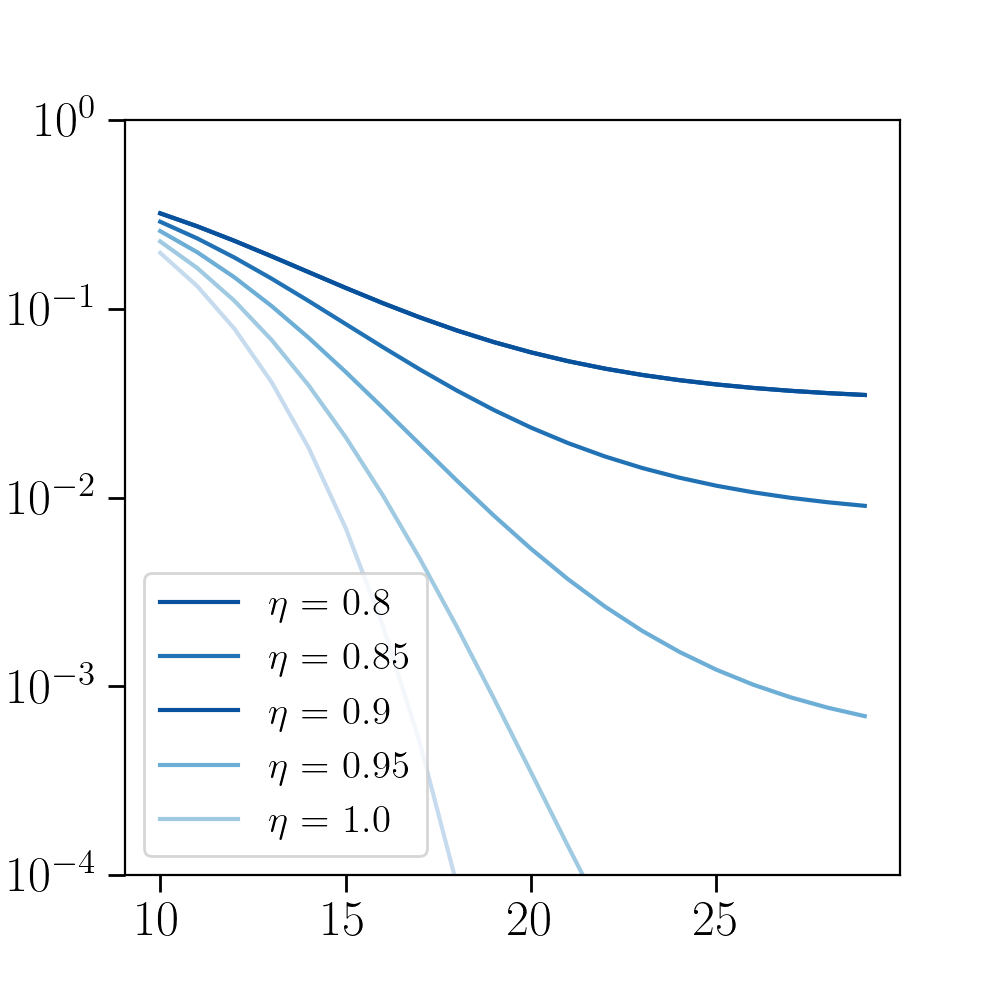

In [316]:
plt.figure(figsize=(5,5))
for η in η_list:
    fids = 1-np.array(fid_total[η_list.index(η)])
    plt.plot(dBs,fids,color = cBlues[η_list.index(η)])

plt.semilogy()
plt.ylim(1e-4,1)
#plt.xlabel('$s_{gkp}$')
#plt.ylabel('$1-\mathcal{F}$')
plt.legend(['$\eta$ = 0.8','$\eta$ = 0.85','$\eta$ = 0.9','$\eta$ = 0.95','$\eta$ = 1.0'],fontsize = 14)

plt.savefig('F_CNOT.pdf')

In [325]:
th = 3
rx = np.array([[np.cos(th),-1j*np.sin(th)],[-1j*np.sin(th),np.cos(th)]])
z = np.array([[1,0,],[0,-1]])
t = np.array([[1,0,],[0,np.exp(1j*np.pi/4)]])
np.conj(t.T)@z@t

array([[ 1.+0.j,  0.+0.j],
       [ 0.+0.j, -1.+0.j]])

In [340]:

from scipy.linalg import expm
z = np.array([[1,0,],[0,-1]])
x = np.array([[0,1],[1,0]])
expm(1j*0.1*x) @ expm(1j*0.8*z ) @ expm(1j*0.3*x)

array([[ 0.64170937+0.70305673j, -0.14251665+0.27131037j],
       [ 0.14251665+0.27131037j,  0.64170937-0.70305673j]])